In [14]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE

In [6]:
housevalue = fch()
x = pd.DataFrame(housevalue.data)
y = housevalue.target
x.shape
y.shape
x.head()
housevalue.feature_names
x.columns = housevalue.feature_names

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.3,random_state = 420)

for i in[Xtrain,Xtest]:
    i.index = range(i.shape[0])

Xtrain.shape

(14448, 8)

In [9]:
reg = LR().fit(Xtrain,Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [12]:
reg.coef_

[*zip(Xtrain.columns, reg.coef_)]

reg.intercept_

-36.256893229203946

In [21]:
MSE(yhat,Ytest)

y.max()
y.min()


0.14999

In [23]:
from sklearn.metrics import r2_score
r2_score(yhat,Ytest)

r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178813

In [24]:
r2_score(y_true=Ytest, y_pred=yhat)
cross_val_score(reg,x,y, cv = 10, scoring = "r2").mean()

0.5110068610524536

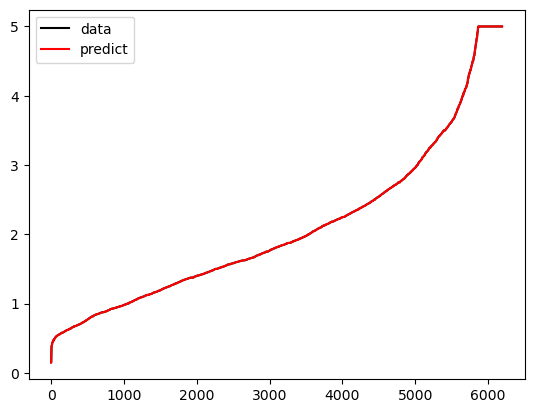

In [27]:
import matplotlib.pyplot as plt
sorted(Ytest)

plt.plot(range(len(Ytest)), sorted(Ytest), c="black", label="data")
plt.plot(range(len(yhat)), sorted(Ytest), c="red", label="predict")
plt.legend()
plt.show()

In [28]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-178.71468148,   -5.64707178,  -15.13900541,  -77.74877079,
        -60.3727755 ])